In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df
import numpy as np
from scipy import stats


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouseDrug = pd.read_csv("data/mouse_drug_data.csv")
clinicalTrial = pd.read_csv("data/clinicaltrial_data.csv")


In [2]:
# Combine the data into a single dataset
trialData = pd.merge(clinicalTrial, mouseDrug, how = 'inner', on = 'Mouse ID')

# Display the data table for preview
trialData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
average_tumorVol = trialData.groupby(['Drug','Timepoint'], as_index = False)['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
print(type(average_tumorVol))
# Preview DataFrame
average_tumorVol.head()

<class 'pandas.core.frame.DataFrame'>


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_tumorVol = trialData.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
se_tumorVol = se_tumorVol.reset_index(level=['Drug', 'Timepoint'])
# Preview DataFrame
se_tumorVol.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
average_tumorvol = average_tumorVol.pivot(index= 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
se_tumorvol = se_tumorVol.pivot(index= 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
# Preview that Reformatting worked
#print(se_tumorvol.head())
#print(average_tumorvol.head())

In [6]:
#define data to be used
data = trialData[['Timepoint','Drug','Tumor Volume (mm3)' ]]

In [7]:
#define the plot features
import matplotlib

# Plot size to 16" x 7"
matplotlib.rc('figure', figsize = (16, 7))

# Font size to 14
matplotlib.rc('font', size = 14)

# Do not display top and right frame lines
#matplotlib.rc('axes.spines', top = True, right = True)

# Set backgound color to white/grey and remove grid lines
matplotlib.rc('axes', facecolor = 'white', grid = False)

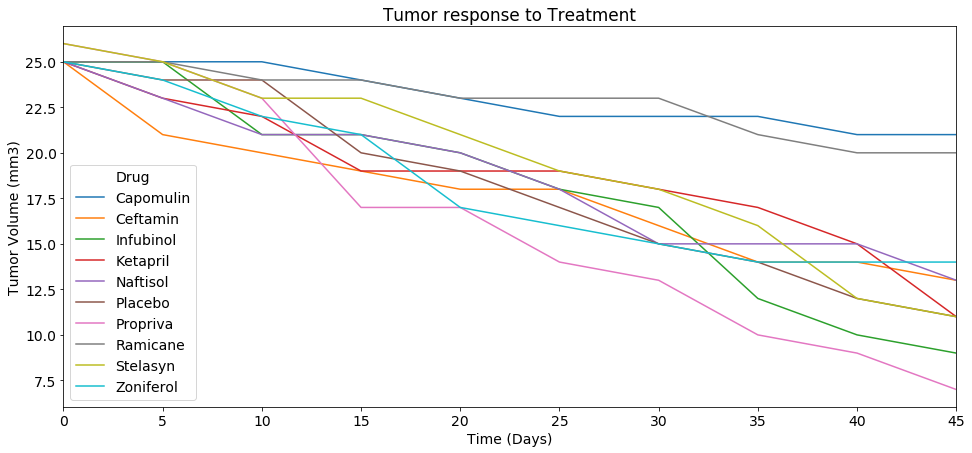

In [8]:
# plot data
fig, ax = plt.subplots()
# use unstack()
data.groupby(['Timepoint','Drug']).count()['Tumor Volume (mm3)'].unstack().plot(ax=ax, legend = 'axessubplot', title = 'Tumor response to Treatment')
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Tumor Volume (mm3)')
plt.savefig('trial_raw.png')

In [9]:
# ax = plt.gca()
# ax.set_xlabel('Time (Days)')
# ax.set_ylabel('Average Tumor Volume (mm3)')
# newdata.plot(x='Timepoint',y='Tumor Volume (mm3)mean',yerr='Tumor Volume (mm3)se'
#                              ,capsize = 4,ax=ax, legend = 'axessubplot', title = 'Tumor response to Treatment')
average_tumorvol.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


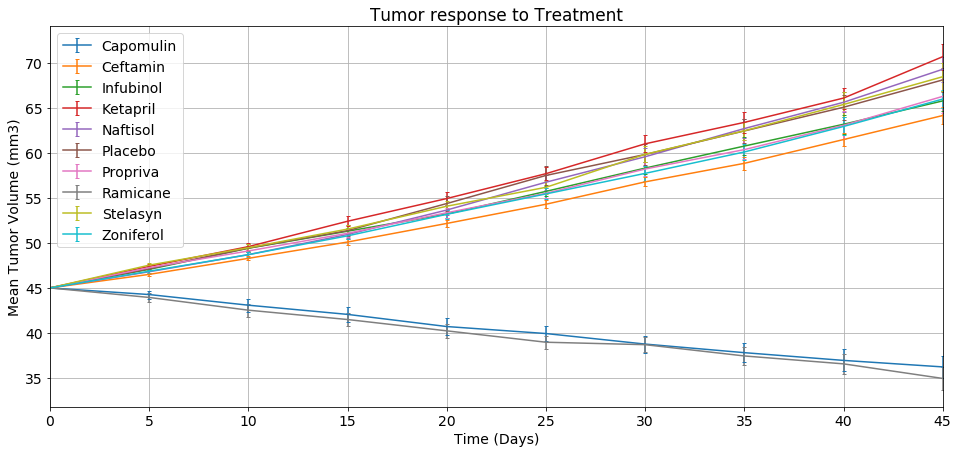

In [10]:
fig, ax = plt.subplots()
#Defining hover parameters - to try later
# hover = HoverTool(
#  tooltips=[( 'Drug' , '@columns'),( '# Days', '@index'),( 'Tumor Size', 'y{0.0,0.0}')])
# #ax.add_tools(hover)

#plot the graph
average_tumorvol.plot.line(yerr=se_tumorvol, ax=ax, legend = True , capsize=2, 
                           title = 'Tumor response to Treatment', grid = True)

#add labels and change legend location to the plot
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Mean Tumor Volume (mm3)')
ax.legend(loc='best')

#Save the figure
plt.savefig(fname = 'TumorVolume.png')

In [11]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
average_metSite = trialData.groupby(['Drug','Timepoint'], as_index = False)['Metastatic Sites'].mean()
type(average_metSite)
# Convert to DataFrame

# Preview DataFrame
average_metSite.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [13]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
se_metSite = trialData.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
se_metSite = se_metSite.reset_index(level=['Drug', 'Timepoint'])

# Preview DataFrame
se_metSite.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [14]:
# Minor Data Munging to Re-Format the Data Frames
average_metsite = average_metSite.pivot(index= 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
se_metsite = se_metSite.pivot(index= 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')


# # # Preview that Reformatting worked
# (se_metsite.head())
# #average_metsite.head()

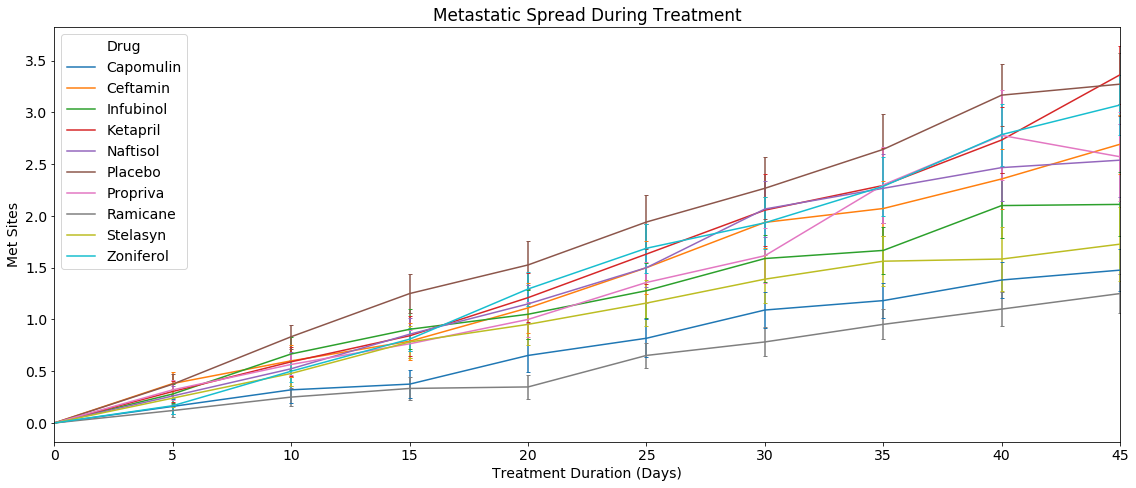

In [15]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
average_metsite.plot.line(yerr=se_metsite, ax=ax, capsize=2, 
                          title = 'Metastatic Spread During Treatment')

#set labels and legend
ax.set_xlabel('Treatment Duration (Days)')
ax.set_ylabel('Met Sites')
plt.tight_layout()

# Save the Figure
plt.savefig(fname = 'Metsite.png')

## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
miceCount = trialData.groupby(['Drug','Timepoint'], as_index = False)['Mouse ID'].count()
# Convert to DataFrame

# Preview DataFrame
miceCount.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [17]:
# Minor Data Munging to Re-Format the Data Frames
micecount = miceCount.pivot(index= 'Timepoint', columns = 'Drug', values = 'Mouse ID')

# Preview DataFrame
micecount.head()
#accounting for percent change in survival
micesurvival =  (micecount/micecount.iloc[0]) * 100
tumorvol = (average_tumorvol/average_tumorvol.iloc[0] -1) * 100
tumorVol = tumorvol.sum(axis = 1)
tumorVol.head()

Timepoint
0       0.000000
5      32.700215
10     62.800791
15     95.596333
20    132.940655
dtype: float64

In [18]:
micesurvival

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


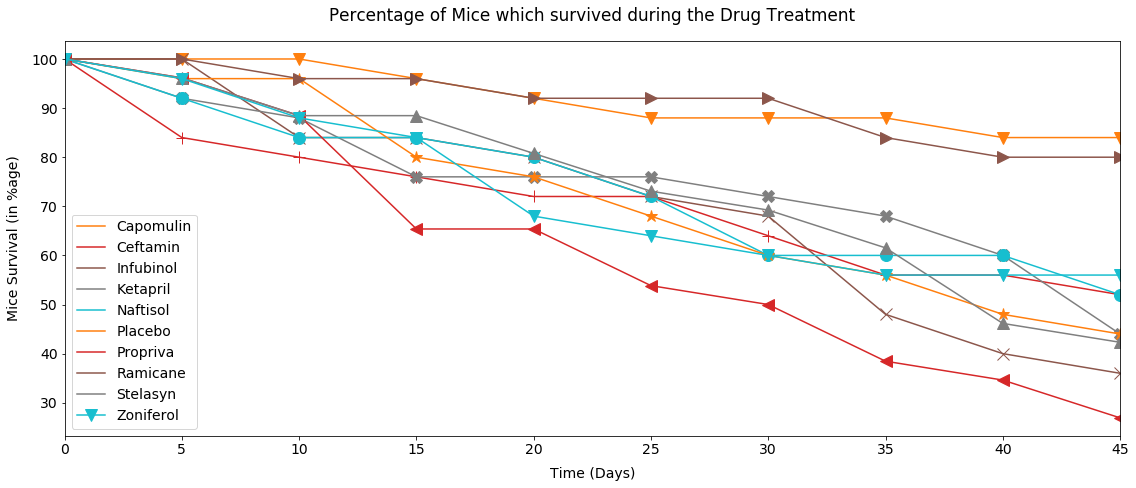

In [19]:
# Generate the Plot (Accounting for percentages)
import itertools
ax = plt.gca()
marker = itertools.cycle(('v', '+', 'x','X' ,'o', '*','<','>','^')) 
for d in micesurvival.columns:
    color = next(ax._get_lines.prop_cycler)['color']
    micesurvival.plot(y=d, marker = next(marker),  markersize=12, ax=ax)
    
ax.set_xlabel('Time (Days)',labelpad = 10)
ax.set_ylabel('Mice Survival (in %age)', labelpad = 10)
ax.set_title('Percentage of Mice which survived during the Drug Treatment', pad = 20)
plt.tight_layout()

# Save the Figure
plt.savefig('MiceSurvivalPercentage.png')


## Summary Bar Graph

In [20]:
# Calculate the percent changes for each drug
tumorpercent =  (average_tumorvol.iloc[-1]/average_tumorvol.iloc[0] - 1) * 100

# Display the data to confirm
tumorpercenttuple = tuple(zip(tumorpercent.index,tumorpercent))

tumorpercenttuple

(('Capomulin', -19.475302667894155),
 ('Ceftamin', 42.51649185589741),
 ('Infubinol', 46.12347172785185),
 ('Ketapril', 57.02879468660604),
 ('Naftisol', 53.92334713476919),
 ('Placebo', 51.29796048315151),
 ('Propriva', 47.24117486320634),
 ('Ramicane', -22.32090046276666),
 ('Stelasyn', 52.085134287899),
 ('Zoniferol', 46.57975086509523))

In [21]:
# Store all Relevant Percent Changes into a Tuple
tumorpercentT = df(index = tumorpercent.index, data = {'Effectiveness':tumorpercent})
tumorpercentT['Effective'] = tumorpercentT['Effectiveness'] < 0
# summary = []

# for t in tumorpercenttuple:
#     summary.append=tumorpercenttuple.t

tumorpercentT
# tumorpercent_tr = tumorpercentT.transpose()
# tumorpercent_tr

,Effectiveness,Effective
Drug,,
Capomulin,-19.475303,True
Ceftamin,42.516492,False
Infubinol,46.123472,False
Ketapril,57.028795,False
Naftisol,53.923347,False
Placebo,51.297960,False
Propriva,47.241175,False
Ramicane,-22.320900,True
Stelasyn,52.085134,False


NameError: name 'plot' is not defined

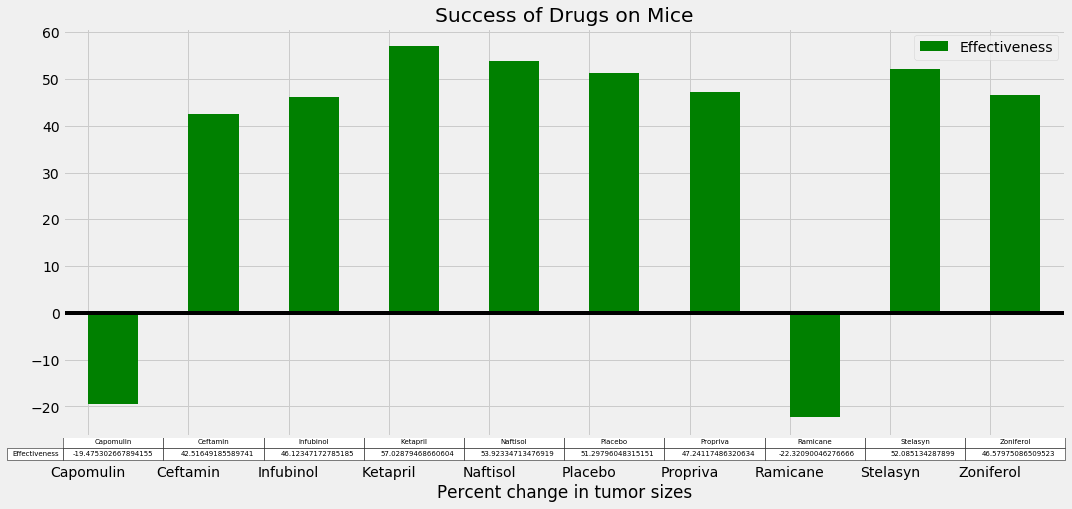

In [23]:
# Splice the data between passing and failing drugs
matplotlib.style.use('fivethirtyeight')
#colormap = [{True: 'Green', False: 'Red'} for c in tumorpercent_tr.Effective]

ax = plt.gca()
# for c in tumorpercent_tr.columns:
#     if tumorpercent_tr.Effectiveness > 0:
#         color = 'Green' 
#     else:
#         color = 'Red'
    #label = tumorpercent_tr.Effectiveness
ax = tumorpercentT.plot(kind='bar', grid = True,title = 'Success of Drugs on Mice', position = 0, ax = ax, 
                        sort_columns=True, table = True, color =tumorpercentT.Effective.map({True: 'Green', False: 'Red'}))


# Orient widths. Add labels, tick marks, etc. 
ax.axhline(0, color='k')
ax.set_xlabel(xlabel = 'Percent change in tumor sizes',labelpad = 4)
ax.minorticks_off()
ax.tick_params(axis='x', pad = 30, labelrotation = 0, width = 2)
#ax.set_xticklabels(tumorpercentT.index,rotation=0,)

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%d' % int(height), ha='center', va='bottom')
    
#autolabel(ax)
# for i in range(len(tumorpercentT.index)):
#     plt.text(x = r4[i]-0.5 , y = bars4[i]+0.1, s = tumorpercentT['Effectiveness'], size = 6)
# ax = tumorpercentT.plot(kind='bar') 
# for idx, label in enumerate(list(tumorpercentT.index)): 
#         for acc in tumorpercentT.columns:
#             value = np.round(tumorpercentT.ix[][acc],decimals=2)
#             ax.annotate(value,
#                         (idx, value),
#                          xytext=(0, 15), 
#                          textcoords='offset points')
            
# Call functions to implement the function calls
# for p in tumorpercentT.patches:
#ax.annotate('{:.2}%'.format(str(tumorpercentT['Effectiveness']), (plot.get_x(), plot.get_height())))


# Save the Figure
plt.tight_layout()
#plt.save_fig('Overall Drug Success')
